In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data =pd.read_csv("titanic.csv")

In [3]:
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
229,1121,0,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.0000,NaN,S
42,934,0,3,"Goldsmith, Mr. Nathan",male,41.0,0,0,SOTON/O.Q. 3101263,7.8500,NaN,S
127,1019,1,3,"McCoy, Miss. Alicia",female,NaN,2,0,367226,23.2500,NaN,Q
15,907,1,2,"del Carlo, Mrs. Sebastiano (Argenia Genovesi)",female,24.0,1,0,SC/PARIS 2167,27.7208,NaN,C
232,1124,0,3,"Wiklund, Mr. Karl Johan",male,21.0,1,0,3101266,6.4958,NaN,S


In [5]:
data.shape

(418, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# Exploratory Data Analysis (EDA)

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

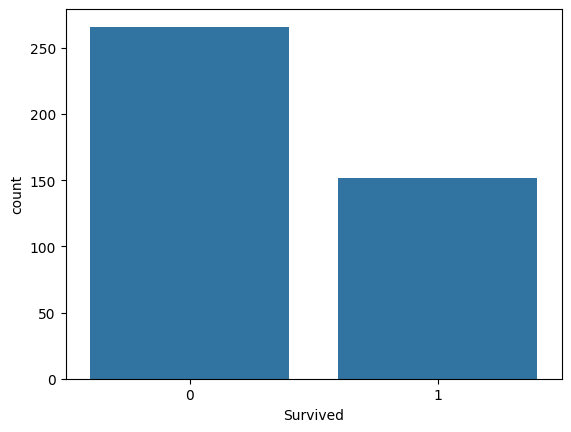

In [11]:
sns.countplot(data=data, x='Survived')

<Axes: xlabel='Survived', ylabel='Age'>

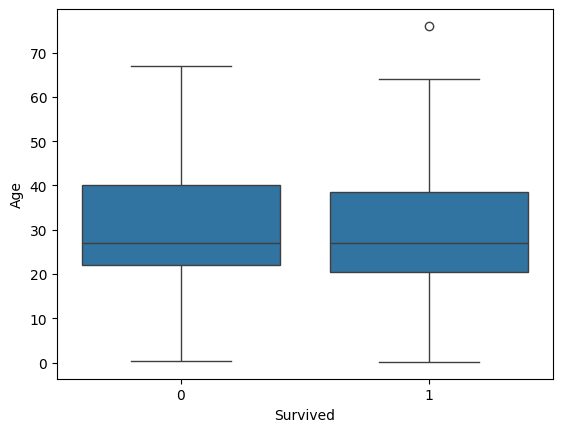

In [12]:
sns.boxplot(data=data, x='Survived', y='Age')


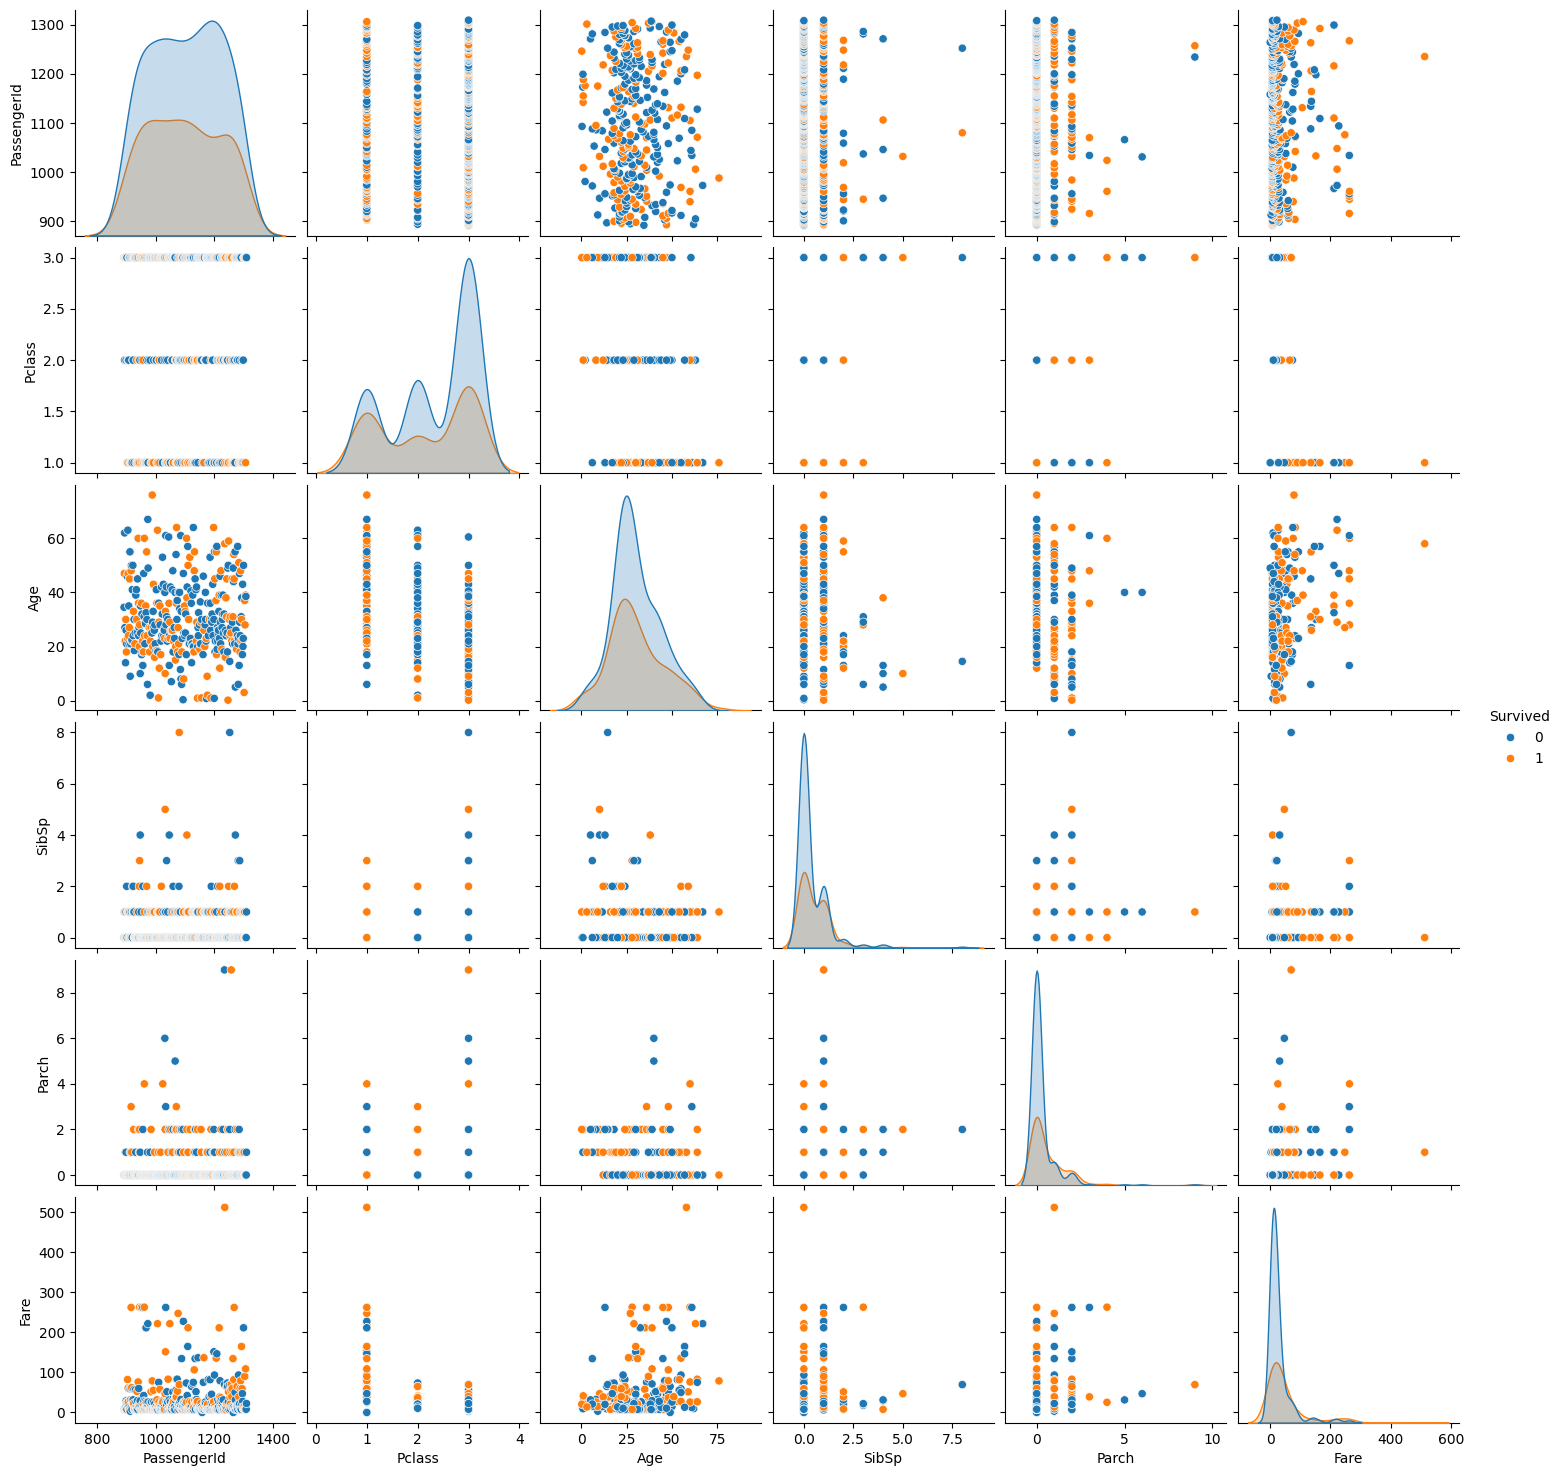

In [13]:
sns.pairplot(data, hue='Survived')

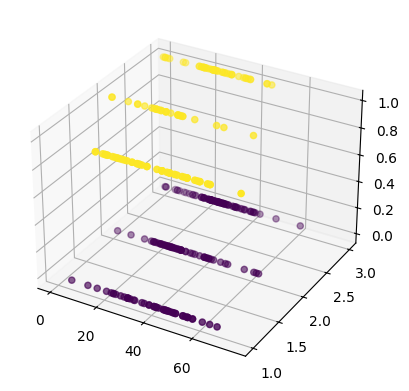

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Pclass'], data['Survived'], c=data['Survived'])

In [18]:
((data.isnull().sum())/len(data))*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [19]:
def missing_percent(Train_data):
    nan_percent=((Train_data.isnull().sum())/len(Train_data))*100
    nan_percent=nan_percent[nan_percent>0].sort_values()
    return nan_percent

In [20]:
nan_percent=missing_percent(data)
nan_percent

Fare      0.239234
Age      20.574163
Cabin    78.229665
dtype: float64

# plot the feature with missing indicating the percent of missing data

([0, 1, 2], [Text(0, 0, 'Fare'), Text(1, 0, 'Age'), Text(2, 0, 'Cabin')])

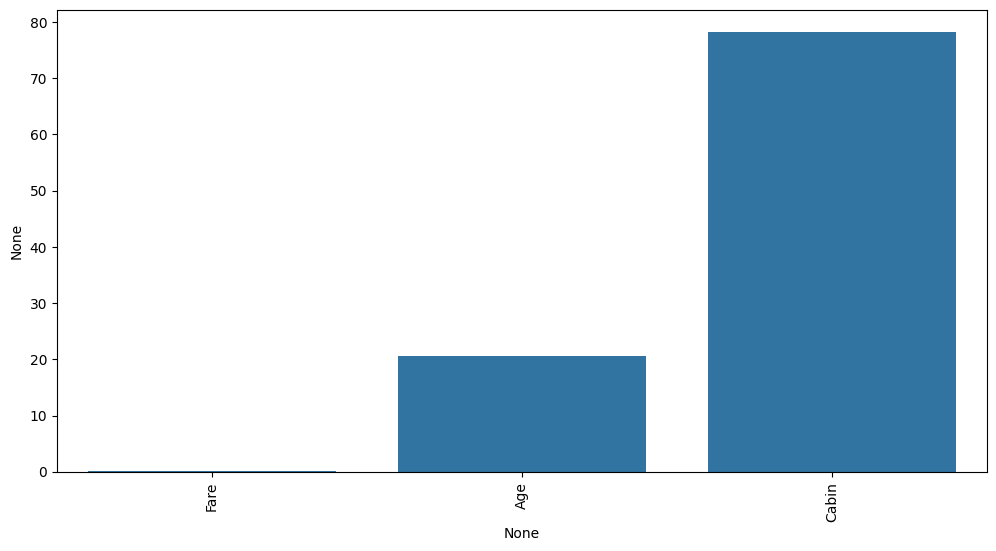

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x=nan_percent.index, y=nan_percent)
plt.xticks(rotation=90)

In [22]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [24]:
df= data.dropna(axis=0, subset=['Embarked'])
df.drop("Cabin", axis = 1, inplace = True)
df["Age"].fillna(df["Age"].mean(), inplace = True)

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [26]:
df.drop('PassengerId', axis=1 , inplace=True)

In [27]:
df.drop('Name' , axis=1 , inplace=True)

In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,Q
1,1,3,female,47.0,1,0,363272,7.0000,S
2,0,2,male,62.0,0,0,240276,9.6875,Q
3,0,3,male,27.0,0,0,315154,8.6625,S
4,1,3,female,22.0,1,1,3101298,12.2875,S


In [30]:
df['Sex']=df['Sex'].replace({'male':0,'female':1})
df.drop([ 'Ticket', 'Fare','Embarked'], axis = 1, inplace = True)
X= df.drop('Survived', axis=1)
y= df['Survived']

# Split the Dataset to Tain & Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# Scaling the Features

In [32]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [33]:
scaler.fit(X_train)

StandardScaler()

In [34]:
scaled_X_train= scaler.transform(X_train)
scaled_X_test= scaler.transform(X_test)

# Train the Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model= LogisticRegression()

In [37]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [38]:
#Model Coeficient:
log_model.coef_

array([[-0.11372414,  4.23676261, -0.0392716 ,  0.04711296,  0.10180531]])

# Predicting Test Data

In [39]:
y_pred= log_model.predict(scaled_X_test)

# Evaluating the Model

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
accuracy_score(y_test, y_pred)

1.0

In [43]:
confusion_matrix(y_test, y_pred)

array([[21,  0],
       [ 0, 21]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        21

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42

